# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Ria Kristi
- **Email:** riakristibasri@gmail.com
- **ID Dicoding:** riakrst

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan jumlah rental sepeda disetiap musim yang berbeda?
- Apakah terdapat peningkatan atau penurunan dalam jumlah total rental dari tahun 2011 ke tahun 2012?
- Bagaimana pengaruh cuaca terhadap jumlah sepeda yang disewakan?

## Import Semua Packages/Library yang Digunakan

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai Data day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil diatas, jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.

Berikutnya, memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada day_df.

In [6]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari hasil diatas, data day_df tidak memiliki duplikasi. Kemudian dari ringkasan parameter statistik juga tidak ada keanehan nilai.

### Cleaning Data

#### Mengganti tipe data pada kolom dteday menjadi datetime.

In [7]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
Periksa apakah tipe data sudah berhasil diganti menggunakan info()

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Melihat data jumlah rental bike sharing berdasarkan musim(season) 
dengan keterangan nilai 1:springer, 2:summer, 3:fall, 4:winter

In [10]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                                
       nunique   max   min         mean          std
season                                              
1          181  7836   431  2604.132597  1399.942119
2          184  8362   795  4992.331522  1695.977235
3          188  8714  1115  5644.303191  1459.800381
4          178  8555    22  4728.162921  1699.615261

Berdasarkan pivot table di atas, dapat diketahui bahwa jumlah total rental tertinggi ada di musim gugur(3:fall) dibandingkan dengan musim lainnya. 

Standar deviasi yang tinggi untuk setiap musim menunjukkan adanya variasi besar dalam penggunaan sepeda dari hari ke hari di setiap musim. 

#### Melihat persebaran jumlah rental bike sharing berdasarkan tahun(yr)
dengan keterangan nilai 0: 2011, 1:2012

In [15]:
day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                               
   nunique   max  min         mean          std
yr                                             
0      365  6043  431  3405.761644  1378.753666
1      366  8714   22  5599.934426  1788.667868

Berdasarkan hasil di atas, dapat dilihat bahwa adanya peningkatan jumlah total rental pada tahun 2012(nilai yr = 1) daripada tahun 2011 (nilai yr = 0).  Rata-rata jumlah total rental per hari pada tahun 2012 (5599.93) jauh lebih tinggi dibandingkan dengan tahun 2011 (3405.76). Hal ini menunjukkan adanya peningkatan signifikan dalam permintaan sepeda dari tahun ke tahun.

#### Melihat persebaran jumlah rental bike sharing berdasarkan cuaca(weathersit) dengan keterangan nilai:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloud
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [20]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa jumlah rental sepeda paling tinggi pada kondisi cuaca Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian (nilai 1: Clear, Few clouds, Partly cloudy, Partly cloudy) 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan jumlah rental sepeda disetiap musim yang berbeda?

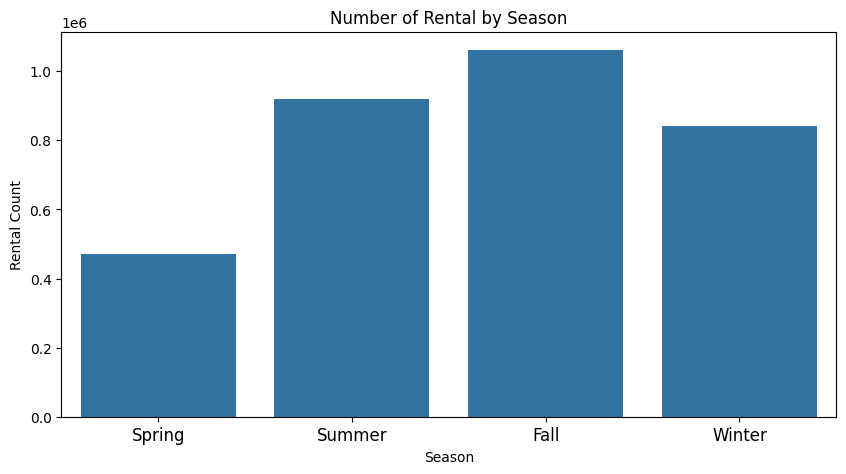

In [50]:
rental_by_season  = day_df.groupby('season')['cnt'].sum().reset_index()
# Mapping untuk musim
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
rental_by_season['season'] = rental_by_season['season'].map(season_mapping)

# Membuat bar plot untuk membandingkan jumlah total rental sepeda untuk setiap musim
plt.figure(figsize=(10, 5))
sns.barplot(
    y=rental_by_season['cnt'], 
    x=rental_by_season['season'],
    data=rental_by_season.sort_values(by='cnt', ascending=False),
)
plt.title('Number of Rental by Season')
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Apakah terdapat peningkatan atau penurunan dalam jumlah total rental dari tahun 2011 ke tahun 2012?

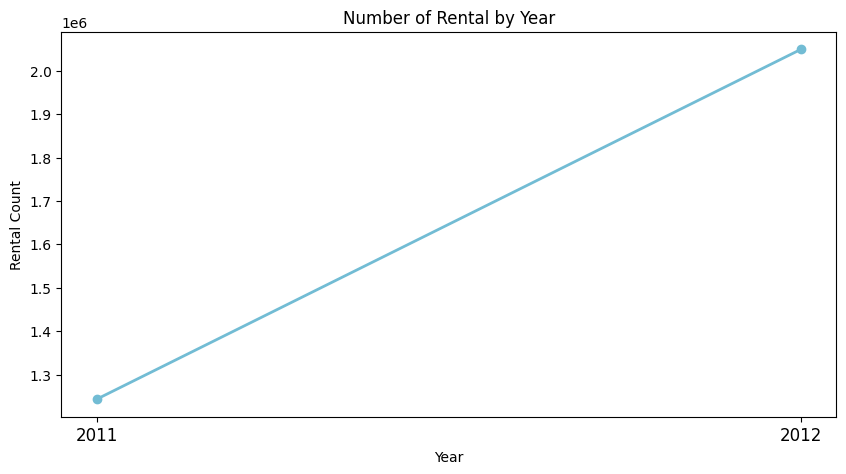

In [54]:
rental_by_year  = day_df.groupby('yr')['cnt'].sum().reset_index()
# Mapping untuk year
year_mapping = {
    0: '2011',
    1: '2012',
}
rental_by_year['yr'] = rental_by_year['yr'].map(year_mapping)

# Membuat bar plot untuk membandingkan jumlah total rental sepeda untuk setiap musim
plt.figure(figsize=(10, 5))
plt.plot(
    rental_by_year['yr'], 
    rental_by_year['cnt'], 
    marker='o', 
    linewidth=2, 
    color="#72BCD4"
)
plt.title('Number of Rental by Year')
plt.xlabel('Year')
plt.ylabel('Rental Count')
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana pengaruh cuaca terhadap jumlah sepeda yang disewakan?

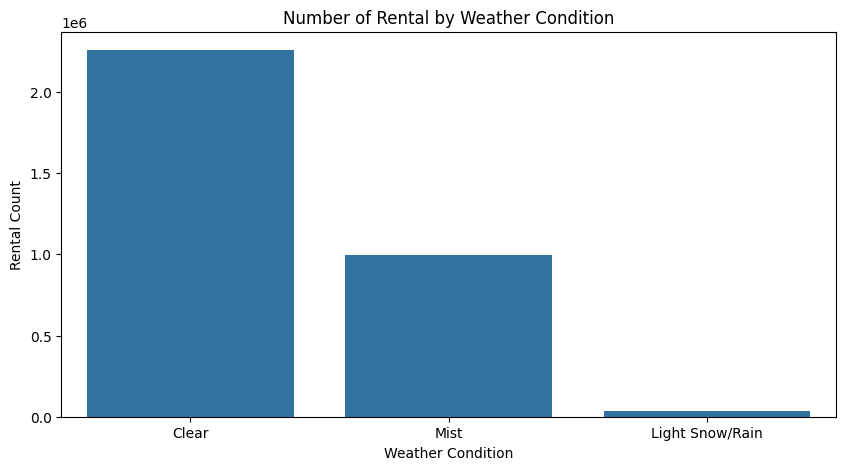

In [61]:
# Menghitung jumlah sepeda yang disewakan untuk setiap kondisi cuaca
rental_by_weather = day_df.groupby('weathersit')['cnt'].sum().reset_index()

# Mapping untuk kondisi cuaca
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Snow/Rain'
}

"""
keterangan jelas(kepanjangan kalo ditulis semua): 
   1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
"""

rental_by_weather['weathersit'] = rental_by_weather['weathersit'].map(weather_mapping)

# Membuat bar plot untuk membandingkan jumlah total rental sepeda untuk setiap kondisi cuaca
plt.figure(figsize=(10, 5))
sns.barplot(
    y=rental_by_weather['cnt'], 
    x=rental_by_weather['weathersit'],
    data=rental_by_weather.sort_values(by='cnt', ascending=False),
)
plt.title('Number of Rental by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Rental Count')
plt.show()


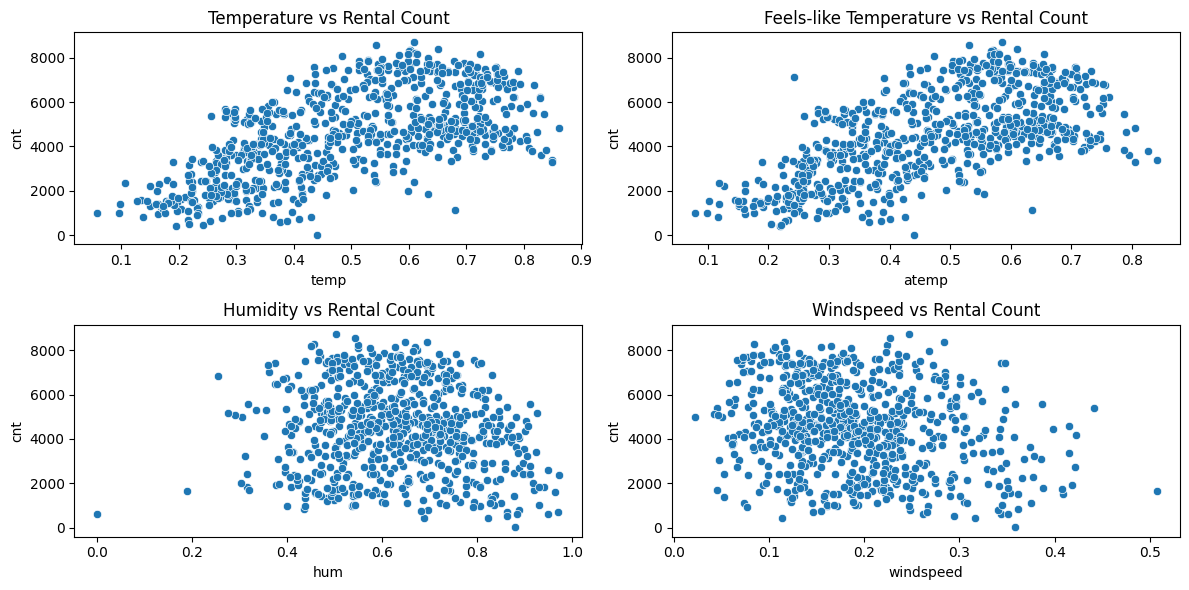

In [49]:
# Membuat scatter plot untuk menganalisis pengaruh cuaca terhadap jumlah sepeda yang disewakan
plt.figure(figsize=(12, 6))

# Scatter plot untuk temperatur (temp) terhadap jumlah rental (cnt)
plt.subplot(2, 2, 1)
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Temperature vs Rental Count')

# Scatter plot untuk temperatur perasaan (atemp) terhadap jumlah rental (cnt)
plt.subplot(2, 2, 2)
sns.scatterplot(x='atemp', y='cnt', data=day_df)
plt.title('Feels-like Temperature vs Rental Count')

# Scatter plot untuk kelembaban (hum) terhadap jumlah rental (cnt)
plt.subplot(2, 2, 3)
sns.scatterplot(x='hum', y='cnt', data=day_df)
plt.title('Humidity vs Rental Count')

# Scatter plot untuk kecepatan angin (windspeed) terhadap jumlah rental (cnt)
plt.subplot(2, 2, 4)
sns.scatterplot(x='windspeed', y='cnt', data=day_df)
plt.title('Windspeed vs Rental Count')

plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1
Berdasarkan gambar di atas, kita dapat melihat bahwa musim gugur merupakan musim yang paling tinggi jumlah rental sepedanya sedangkan musim semi yang terendah.

- Conclution pertanyaan 2
Terdapat peningkatan jumlah total rental pada tahun 2012 daripada tahun 2011. Hal ini menunjukkan adanya peningkatan signifikan dalam rental sepeda dari tahun ke tahun.

- Conclution pertanyaan 3
Berdasarkan chart 'Number of Rental by Weather Condition' di atas,  diketahui bahwa kebanyakan orang melakukan rental sepeda paling banyak pada kondisi cuaca Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian (nilai 1: Clear, Few clouds, Partly cloudy, Partly cloudy). 


Kemudian untuk chart Scatterplot:


Temperatur dan Rental Count: Terlihat adanya tren positif antara temperatur dan jumlah sepeda yang disewakan, yang berarti semakin tinggi temperatur, semakin tinggi juga jumlah sepeda yang disewakan. Hal ini wajar karena cuaca yang hangat cenderung membuat orang lebih tertarik untuk menggunakan sepeda.

Feeling temperaturean dan Rental Count: Korelasi antarfeeling temperaturean dan jumlah sepeda yang disewakan juga menunjukkan tren positif yang mirip dengan temperatur aktual. Ini menunjukkan bahwa persepsi suhu juga memengaruhi keputusan orang untuk menyewa sepeda
.humidityaban dan Rental Count: Tidak terlihat pola yang jelas antara kelembaban dan jumlah sepeda yang disewakan. Namun, sebagian besar data berada di rentang kelembaban yang moderat, dan jumlah sepeda yang disewakan tampak stabil di sebagian besar rentang terseb
uwindspeed Angin dan Rental Count: Tidak terlihat korelasi yang jelas antara kecepatan angin dan jumlah sepeda yang disewakan. Rentang kecepatan angin yang diamati cenderung rendah, dan jumlah sepeda yang disewakan tetap relatif stabil di sebagian besar rentang tersebut.

## Metode RFM analysis

In [75]:
# Menghitung nilai Recency, Frequency, dan Monetary
snapshot_date = max(day_df['dteday']) + dt.timedelta(days=1)  # Tanggal snapshot setelah transaksi terakhir
rfm_df = day_df.groupby('registered').agg({
    'dteday': lambda x: (snapshot_date - x.max()).days,  # Recency: berapa hari sejak pembelian terakhir
    'instant': 'nunique',  # Frequency: jumlah pembelian yang unik
    'cnt': 'sum'  # Monetary: total belanja
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'recency', 'frequency', 'monetary']

# Menampilkan 5 baris pertama hasil RFM analysis
print(rfm_df .head())

   registered  recency  frequency  monetary
0          20       64          1        22
1         416      705          1       431
2         432        6          1       441
3         451      373          1       754
4         472      706          1       506


C:\Users\Ria Kristi Basri\AppData\Local\Temp\ipykernel_5004\1638657060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Ria Kristi Basri\AppData\Local\Temp\ipykernel_5004\1638657060.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\Ria Kristi Basri\AppData\Local\Temp\ipykernel_5004\1638657060.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

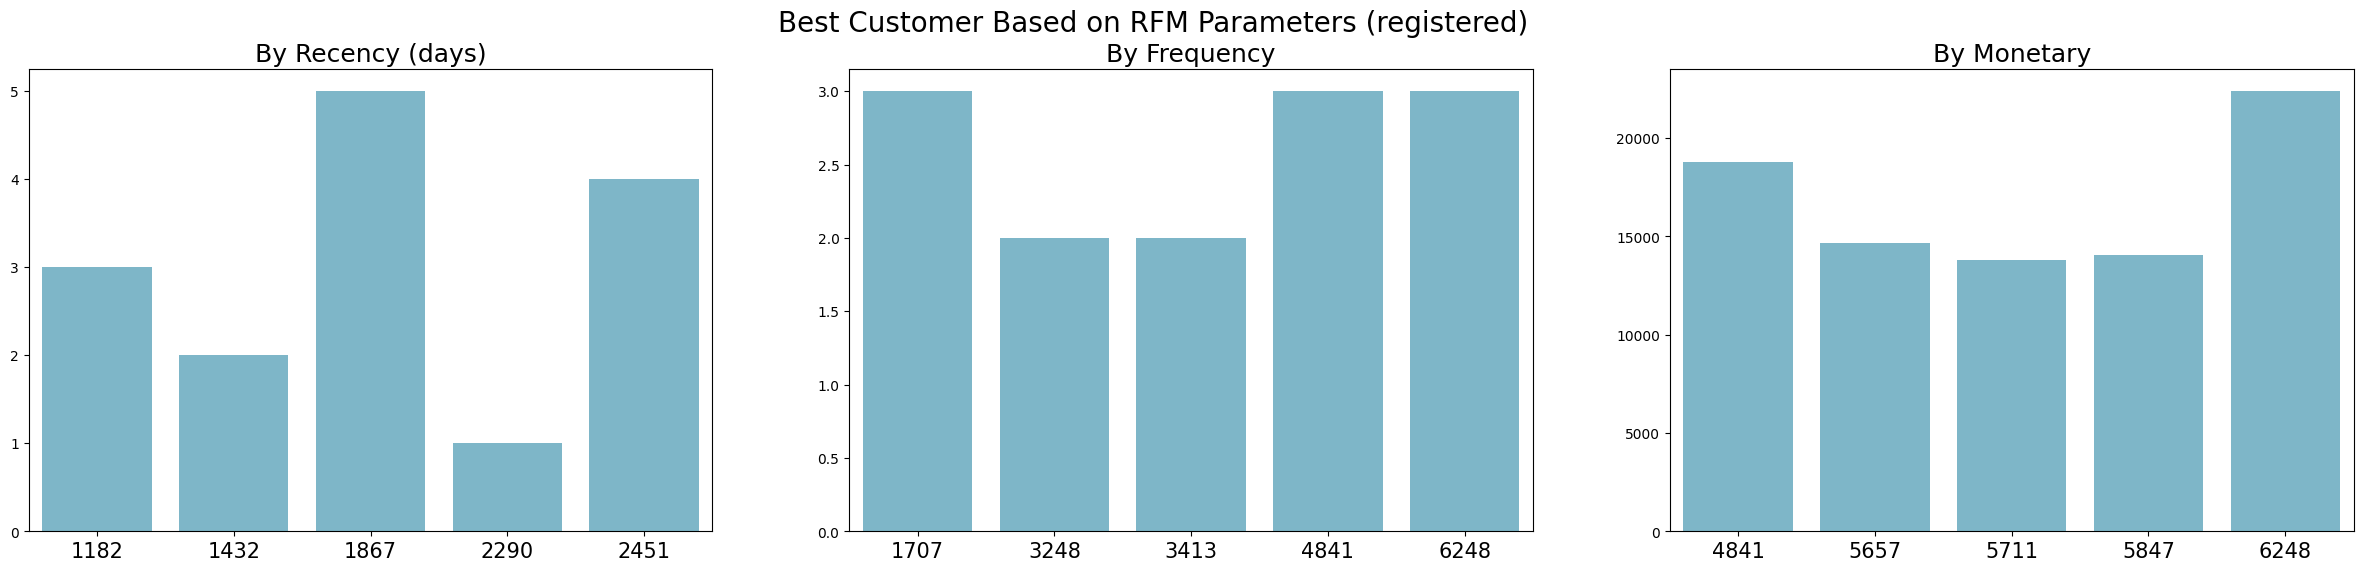

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="registered", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (registered)", fontsize=20)
plt.show()


### Menyimpan berkas data yang telah dibersihkan

In [74]:
day_df.to_csv("main_data.csv", index=False)